## Abstract

The Palmer Penguins dataset, collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, provides physiological measurements for three species of penguins—Adélie, Chinstrap, and Gentoo—inhabiting the Palmer Archipelago. First published in 2014 and later made widely accessible to the data science community, this dataset serves as a valuable resource for exploring classification techniques and species differentiation.
In this blog post, I analyze the dataset using machine learning models to classify penguin species based on features such as flipper length, body mass, and culmen dimensions. By analyzing physical measurements we identify key features that contribute to accurate species prediction. Through data visualization and feature selection, we uncover patterns that distinguish species based on island location and physical traits. Using logistic regression, we evaluate different feature combinations and determine an optimal set for classification and acheive a 99% training accuracy and a 100% testing accuracy. Our findings highlight the power of data-driven approaches in biological classification while ensuring a reproducible and insightful methodology.

In [1]:
import torch

import matplotlib.pyplot as plt

def perceptron_data(n_points=100, noise=0.1):
    """
    Generate linearly separable 2D data for binary classification.
    """
    torch.manual_seed(123)
    y = torch.arange(n_points) >= n_points // 2
    X = y[:, None] + torch.normal(0.0, noise, size=(n_points, 2))
    X = torch.cat((X, torch.ones((n_points, 1))), dim=1)  # Add bias term
    y = 2 * y - 1  # Convert from {0, 1} to {-1, 1}
    return X, y

X, y = perceptron_data()

Lets just Visualize the data below 

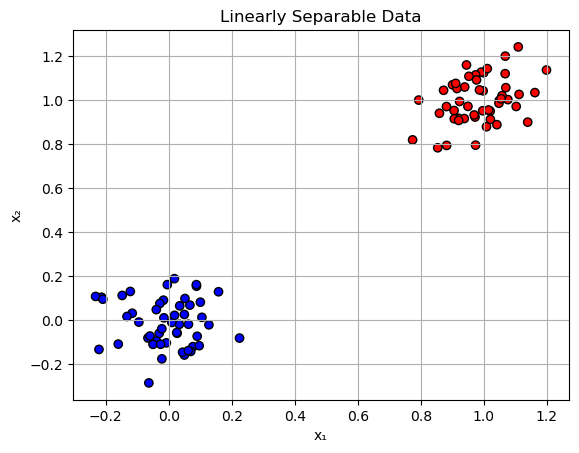

In [2]:
def plot_data(X, y):
    y_plot = (y > 0).float()  # Convert back to {0, 1} for coloring
    plt.scatter(X[:, 0], X[:, 1], c=y_plot, cmap="bwr", edgecolors='k')
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.title("Linearly Separable Data")
    plt.grid(True)
    plt.show()

plot_data(X, y)

##  Train Using the Perceptron Optimizer (Minimal Training Loop)


In [13]:
from perceptron import Perceptron, PerceptronOptimizer

model = Perceptron()
opt = PerceptronOptimizer(model)

losses = []
epochs = 10

for epoch in range(epochs):
    for i in range(X.shape[0]):
        x_i = X[i].unsqueeze(0)  # we make sure x_i is 2D tensor
        y_i = y[i] # y_i is 1D tensor
        opt.step(x_i, y_i)
    
    # Evaluate total loss after each epoch
    loss = model.loss(X, y)
    print(f"Epoch {epoch+1}: loss = {loss.item():.4f}")
    losses.append(loss.item())



Epoch 1: loss = 0.4700
Epoch 2: loss = 0.1500
Epoch 3: loss = 0.1700
Epoch 4: loss = 0.1900
Epoch 5: loss = 0.1800
Epoch 6: loss = 0.1900
Epoch 7: loss = 0.1800
Epoch 8: loss = 0.1900
Epoch 9: loss = 0.1900
Epoch 10: loss = 0.1900


# Expirements
